In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.category import UnitData


In [2]:
#read data from nationla database CSV file
df = pd.read_csv("/home/okese/projects/oamk/Thesis/Data/defactopopn_10%_20221011d.csv",usecols=["nqid","urbrur", "a11d","p02","p09","p12b","p13a","p13b","p13e","p16","p11a","p19atotal","econact","paidwork","labforce"])
df.rename(columns={"nqid":"id","urbrur":"URBAN_RURAL", "a11d":"SEX","p02":"AGE","p09":"RELIGION","p12b":"HIGHEST_EDU","p13a":"WORKED_FOR_PAY","p13b":"MAIN_EGAGEMENT","p13e":"REASON_FOR_NO_WORK","p16":"STATUS_OF_EMPLOYMENT","p11a":"LITERATE","p19atotal":"OWN_ICT_ITEM","econact":"ECONOMIC_ACTIVITY","paidwork":"PAID_WORK","labforce":"LABOUR_FORCE"}, inplace=True)

In [4]:
#save df with only desired columns to a csv file
df.to_csv('population_data.csv', index=False)

In [2]:
#load the saved csv with desired columns"
df = pd.read_csv("population_data.csv", usecols=["id","URBAN_RURAL","SEX","AGE","RELIGION","HIGHEST_EDU","ECONOMIC_ACTIVITY","STATUS_OF_EMPLOYMENT","LABOUR_FORCE","WORKED_FOR_PAY"])

In [3]:
df.head()


,id,URBAN_RURAL,SEX,AGE,RELIGION,HIGHEST_EDU,WORKED_FOR_PAY,STATUS_OF_EMPLOYMENT,ECONOMIC_ACTIVITY,LABOUR_FORCE
0,2137,Rural,Female,16,"Protestant (Anglican, Lutheran, Presbyterian, ...",JSS/JHS,No,NaN,Outside Labour Force,Outside labour force
1,2137,Rural,Male,22,"Protestant (Anglican, Lutheran, Presbyterian, ...",JSS/JHS,No,NaN,Outside Labour Force,Outside labour force
2,2137,Rural,Male,19,"Protestant (Anglican, Lutheran, Presbyterian, ...",SSS/SHS,No,NaN,Outside Labour Force,Outside labour force
3,2137,Rural,Male,20,"Protestant (Anglican, Lutheran, Presbyterian, ...",JSS/JHS,No,NaN,Outside Labour Force,Outside labour force
4,2137,Rural,Female,52,"Protestant (Anglican, Lutheran, Presbyterian, ...",NaN,No,NaN,Outside Labour Force,Outside labour force


In [4]:
# df["PAID_WORK"].value_counts()
# df["WORKED_FOR_PAY"].value_counts()
# df["OWN_ICT_ITEM"].value_counts()
# df["ECONOMIC_ACTIVITY"].value_counts()
df["RELIGION"].value_counts()

Pentecostal/ Charismatic                                           971907
Islam                                                              611882
Protestant (Anglican, Lutheran, Presbyterian,  Methodist, etc.)    535379
Other Christian                                                    379196
Catholic                                                           306389
No Religion                                                        138251
Traditionalist                                                      99630
Other (specify)                                                     33136
Name: RELIGION, dtype: int64

In [4]:
# extracting the people who are eligible for work by removing those who are outside the labour force.
df_in_labour=df.loc[(df["ECONOMIC_ACTIVITY"] !="Outside Labour Force") ]

#dropping empty values of the highest education column
df_in_labour.dropna(subset = ['HIGHEST_EDU'], inplace=True)

# selecting those who have tertiary education 
df_grad=df_in_labour[df_in_labour["HIGHEST_EDU"].str.contains('Ter')]
df_grad.head()

/tmp/ipykernel_28153/1901083011.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_in_labour.dropna(subset = ['HIGHEST_EDU'], inplace=True)


,id,URBAN_RURAL,SEX,AGE,RELIGION,HIGHEST_EDU,WORKED_FOR_PAY,STATUS_OF_EMPLOYMENT,ECONOMIC_ACTIVITY,LABOUR_FORCE
140,3483,Rural,Male,35,Catholic,Tertiary - Bachelor?s Degree,"Yes, worked for pay (cash or in-kind)",Employee,Employed,In labour force
172,1839,Rural,Male,51,Pentecostal/ Charismatic,Tertiary - Bachelor?s Degree,"Yes, worked for pay (cash or in-kind)",Employee,Employed,In labour force
217,3461,Rural,Male,63,Catholic,Tertiary - Bachelor?s Degree,"Yes, worked for profit on own/family busines",Contributing family worker,Employed,In labour force
419,4035,Rural,Female,24,Catholic,Tertiary - Post graduate Certificate/Diploma,"Yes, worked for pay (cash or in-kind)",Employee,Employed,In labour force
423,2444,Rural,Male,32,"Protestant (Anglican, Lutheran, Presbyterian, ...",Tertiary - Bachelor?s Degree,"Yes, worked for profit on own/family busines",Employee,Employed,In labour force


In [5]:
df_umenployed = df_in_labour.loc[(df_in_labour["ECONOMIC_ACTIVITY"] =="Unemployed")]
df_umenployed.head()

,id,URBAN_RURAL,SEX,AGE,RELIGION,HIGHEST_EDU,WORKED_FOR_PAY,STATUS_OF_EMPLOYMENT,ECONOMIC_ACTIVITY,LABOUR_FORCE
30,3449,Rural,Male,46,Other Christian,JSS/JHS,No,Employee,Unemployed,In labour force
41,1690,Rural,Male,24,Catholic,SSS/SHS,No,NaN,Unemployed,In labour force
43,1690,Rural,Female,41,Catholic,Secondary,No,Employee,Unemployed,In labour force
162,1509,Rural,Female,17,Catholic,JSS/JHS,No,NaN,Unemployed,In labour force
282,2093,Rural,Male,32,Catholic,SSS/SHS,No,Self-employed without employee(s),Unemployed,In labour force


Text(0.5, 1.0, 'employment status of graduates')

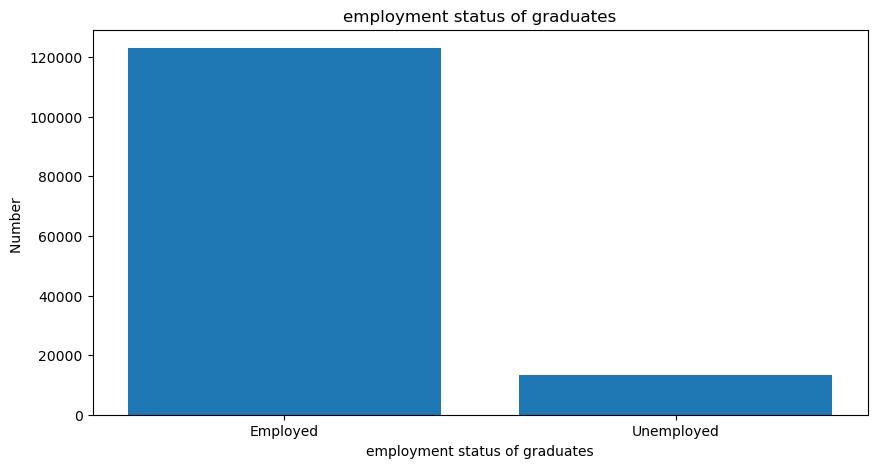

In [7]:
plt.subplots(1,1, figsize=(10, 5))
plt.bar(df_grad["ECONOMIC_ACTIVITY"].value_counts().index, df_grad["ECONOMIC_ACTIVITY"].value_counts().values)
plt.xlabel("employment status of graduates")
plt.ylabel("Number ")
plt.title ("employment status of graduates")

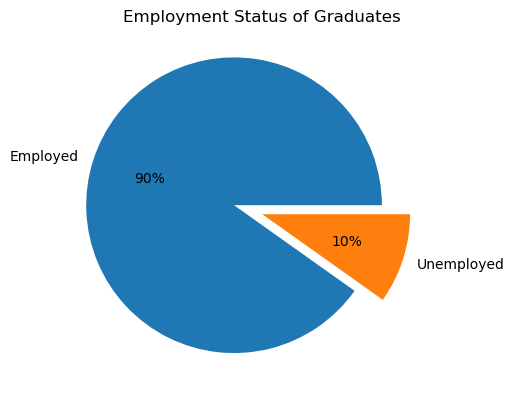

In [11]:
plt.pie(df_grad["ECONOMIC_ACTIVITY"].value_counts(), labels=df_grad["ECONOMIC_ACTIVITY"].value_counts().index, explode = [0.2, 0], autopct='%1.0f%%')
plt.title ("Employment Status of Graduates")
plt.show()

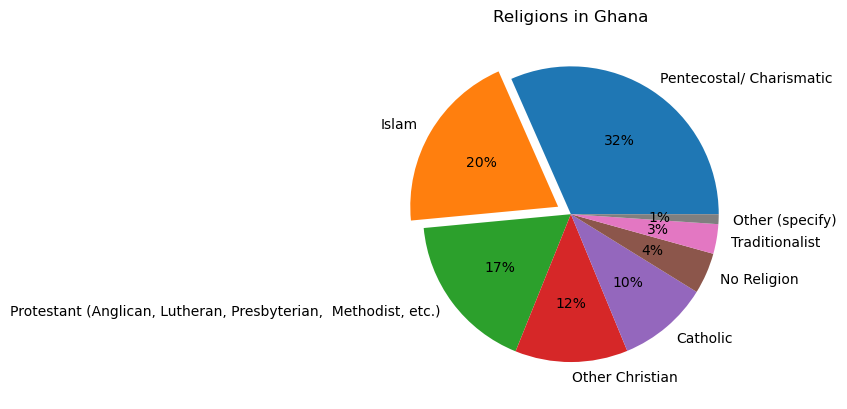

In [10]:
plt.pie(df["RELIGION"].value_counts(), labels=df["RELIGION"].value_counts().index, explode = [0,0.1,0,0,0,0,0,0], autopct='%1.0f%%')
plt.title ("Religions in Ghana")
plt.show()

Text(0.5, 1.0, 'Highest Education Level for unemployed people in Ghana')

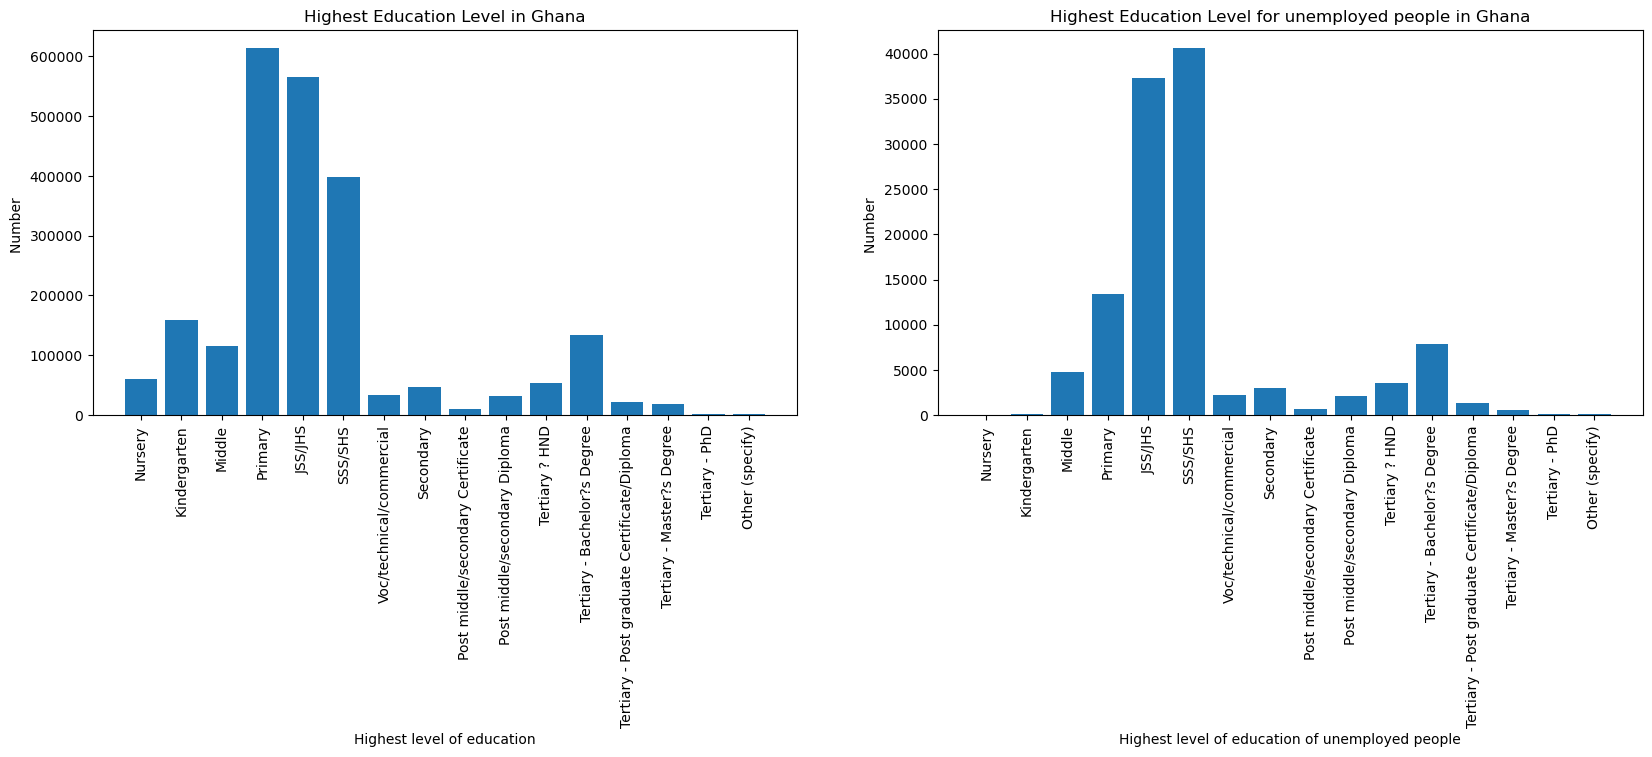

In [12]:
df_edu=df["HIGHEST_EDU"].value_counts()
df_edu.index
edu_list=['Nursery','Kindergarten','Middle','Primary','JSS/JHS','SSS/SHS','Voc/technical/commercial','Secondary', 'Post middle/secondary Certificate','Post middle/secondary Diploma', 'Tertiary ? HND','Tertiary - Bachelor?s Degree','Tertiary - Post graduate Certificate/Diploma','Tertiary - Master?s Degree', 'Tertiary - PhD','Other (specify)']

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.bar(df_edu.index, df_edu.values, xunits=UnitData(edu_list))
plt.xticks(rotation = 90)
plt.xlabel("Highest level of education")
plt.ylabel("Number ")
plt.title ("Highest Education Level in Ghana")

unemployed = df_umenployed["HIGHEST_EDU"].value_counts()
unemployed

plt.subplot(1,2,2)
plt.bar(unemployed.index, unemployed.values, xunits=UnitData(edu_list))
plt.xticks(rotation = 90)
plt.xlabel("Highest level of education of unemployed people")
plt.ylabel("Number ")
plt.title ("Highest Education Level for unemployed people in Ghana")


Text(0.5, 1.0, 'Highest Education Level in Ghana')

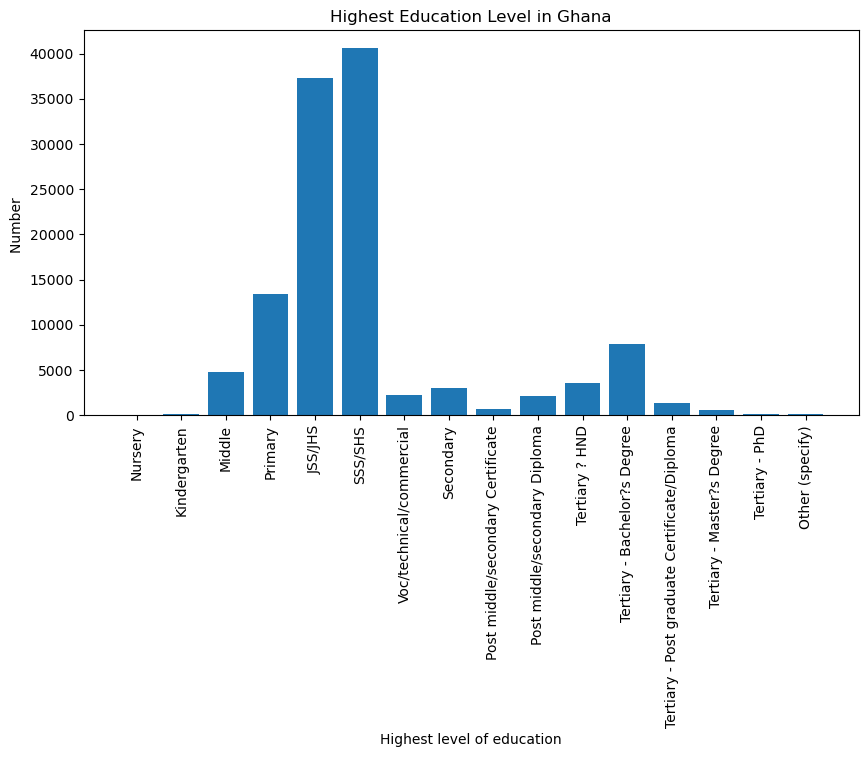

In [75]:
unemployed = df_umenployed["HIGHEST_EDU"].value_counts()
unemployed

plt.subplots(1,1, figsize=(10, 5))
plt.bar(unemployed.index, unemployed.values, xunits=UnitData(edu_list))
plt.xticks(rotation = 90)
plt.xlabel("Highest level of education")
plt.ylabel("Number ")
plt.title ("Highest Education Level in Ghana")


Text(0.5, 1.0, 'Age distribution of the population of Ghana')

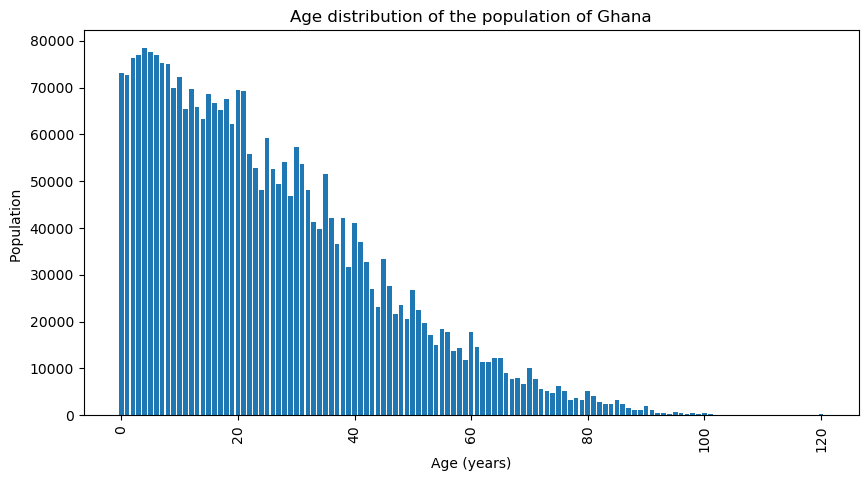

In [14]:
#Age distribution 
age = df["AGE"].value_counts()
unemployed

plt.subplots(1,1, figsize=(10, 5))
plt.bar(age.index, age.values, xunits=UnitData(edu_list))
plt.xticks(rotation = 90)
plt.xlabel("Age (years)")
plt.ylabel("Population ")
plt.title ("Age distribution of the population of Ghana")

(array([8.90110e+05, 7.76400e+05, 6.01785e+05, 3.95403e+05, 2.20844e+05,
        1.28364e+05, 5.11950e+04, 1.65770e+04, 2.45800e+03, 4.36000e+02]),
 array([  0.,  12.,  24.,  36.,  48.,  60.,  72.,  84.,  96., 108., 120.]),
 <BarContainer object of 10 artists>)

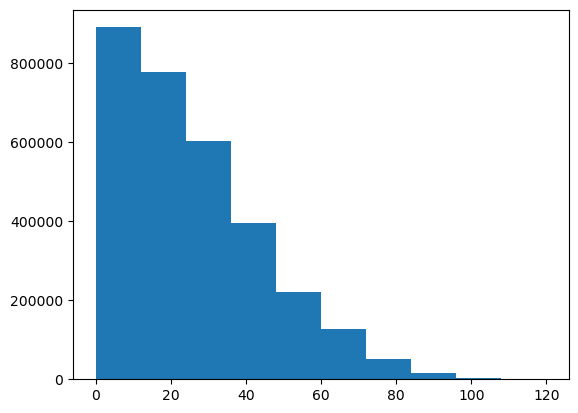

In [15]:
plt.hist(df["AGE"])

In [20]:
df["LITERATE"].isnull().sum()

462339

In [44]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print (i, "has NaN")
    else:
        pass #print (i, "has no NaN")
    print ("========")

RELIGION has NaN
LITERATE has NaN
HIGHEST_EDU has NaN
WORKED_FOR_PAY has NaN
MAIN_EGAGEMENT has NaN
REASON_FOR_NO_WORK has NaN
STATUS_OF_EMPLOYMENT has NaN
OWN_ICT_ITEM has NaN
ECONOMIC_ACTIVITY has NaN
PAID_WORK has NaN
LABOUR_FORCE has NaN


In [ ]:
for i in df.columns:
    print(df.value_counts(i))
    print ("======")

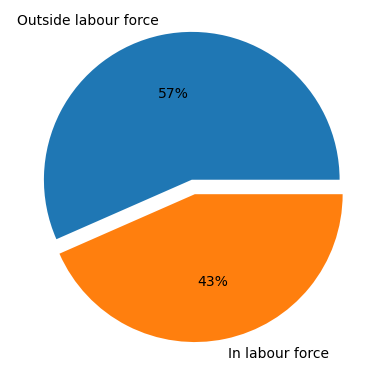

In [17]:
plt.pie(df["LABOUR_FORCE"].value_counts(), labels=df["LABOUR_FORCE"].value_counts().index, explode = [0.1, 0], autopct='%1.0f%%')
# plt.title("Population of Ghana who are eligible for work ")
plt.show()

In [52]:
df["LABOUR_FORCE"].value_counts()

1171562